In [1]:
# https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/


In [2]:
import pandas as pd
stock = pd.read_pickle('df2330.pkl')
stock[-6:]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-06,590.0,580.0,590.0,587.0,30725590.0,587.0
2021-05-07,600.0,589.0,594.0,599.0,28075722.0,599.0
2021-05-10,597.0,588.0,596.0,589.0,20434079.0,589.0
2021-05-11,580.0,570.0,579.0,571.0,59349193.0,571.0
2021-05-12,571.0,518.0,567.0,560.0,131741482.0,560.0
2021-05-13,563.0,541.0,547.0,547.0,68597165.0,547.0


In [3]:
# 複習一下ML(Machine Learning)
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
print(X[:3], y[:3])
# build model 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=400)
model.fit(X, y)
print(model.score(X, y))
# dump model pickle
import joblib
joblib.dump(model, 'model.pkl')

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]] [0 0 0]
0.9733333333333334


['model.pkl']

In [4]:
# 複習一下ML(Machine Learning)
import joblib
cls = joblib.load('model.pkl')
y_hat = cls.predict(X)
(y_hat == y).sum() / len(y)

0.9733333333333334

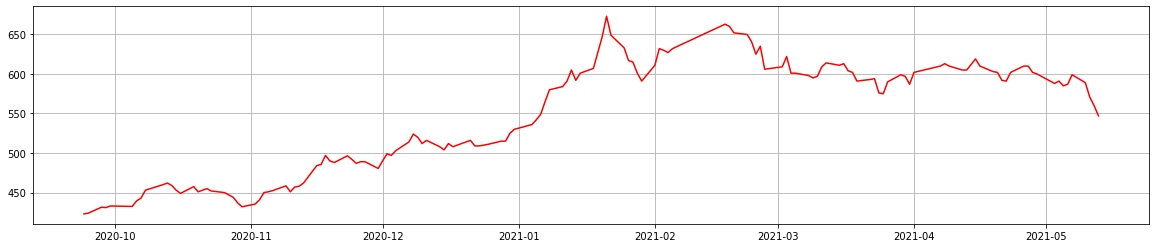

In [5]:
# Time Series 數據分析
last = -150
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 4))
plt.plot(stock.index[last:], stock['Close'][last:], color='red')
plt.grid()
plt.show()

In [6]:
# 解釋
# 時間序列資料處理方式 從單一 維度=特徵=欄位 產生 X 與 y

data = [10, 20, 30, 40, 50, 60, 70, 80, 90]

import numpy as np

# split a univariate sequence into samples X, y
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

X,  y = split_sequence(data, 3)
X, y, data

(array([[10, 20, 30],
        [20, 30, 40],
        [30, 40, 50],
        [40, 50, 60],
        [50, 60, 70],
        [60, 70, 80]]),
 array([40, 50, 60, 70, 80, 90]),
 [10, 20, 30, 40, 50, 60, 70, 80, 90])

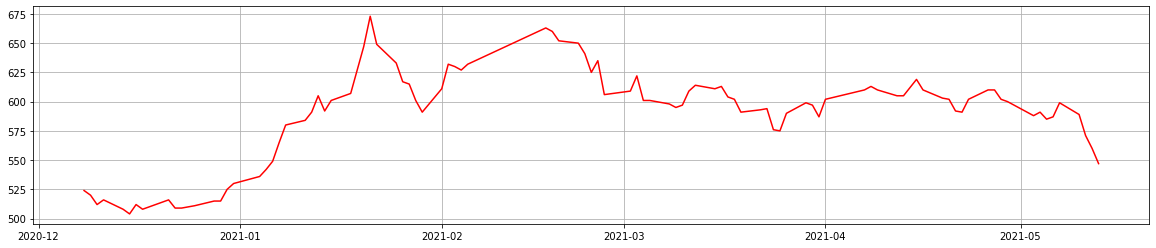

In [7]:
# Time Series 數據分析
last = -100
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 4))
plt.plot(stock.index[last:], stock['Close'][last:], color='red')
plt.grid()
plt.show()

In [8]:
# 時間序列資料處理方式 從單一 維度=特徵=欄位 產生 X 與 y

df = stock[-100:] # 僅取過去一百天的數據

import numpy as np

# split a univariate sequence into samples X, y
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
# 根據每10天預設下一天
X,  y = split_sequence(df.Close.to_list(), 10)
X[:3], y[:3], df.Close[:8]

(array([[524., 520., 512., 516., 508., 504., 512., 508., 510., 516.],
        [520., 512., 516., 508., 504., 512., 508., 510., 516., 509.],
        [512., 516., 508., 504., 512., 508., 510., 516., 509., 509.]]),
 array([509., 509., 510.]),
 Date
 2020-12-08    524.0
 2020-12-09    520.0
 2020-12-10    512.0
 2020-12-11    516.0
 2020-12-14    508.0
 2020-12-15    504.0
 2020-12-16    512.0
 2020-12-17    508.0
 Name: Close, dtype: float64)

In [9]:
# 使用 
# https://scikit-learn.org/stable/modules/multiclass.html
# solver : {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, 
#　
from sklearn.linear_model import LinearRegression
model_tw = LinearRegression()
model_tw.fit(X, y)
model_tw.score(X, y)

0.9130870212663542

In [10]:
# 預測的股價
y_pred = model_tw.predict(X)
print(len(y_pred))

90


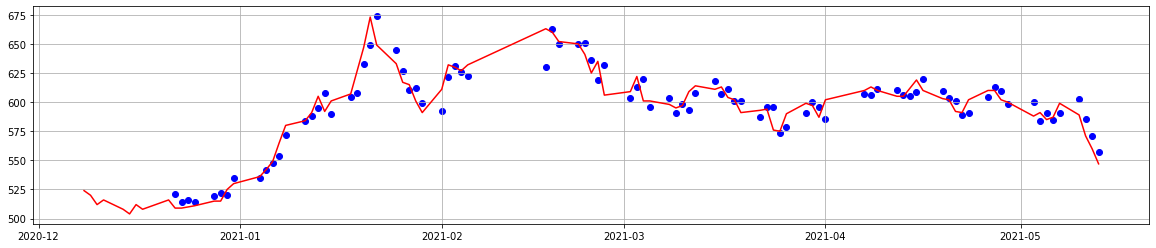

In [11]:
# Time Series 數據分析
last = -100
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 4))
plt.plot   (stock.index[last:], stock['Close'][last:], color='red')
plt.scatter(stock.index[-1*len(y_pred):], y_pred, color='blue')
plt.grid()
plt.show()

In [12]:

'''
ValueError: Expected 2D array, got 1D array instead:
array=[600. 588. 591. 585. 587. 599. 589. 571. 560. 547.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

ValueError: X has 1 features per sample; expecting 10

'''

'\nValueError: Expected 2D array, got 1D array instead:\narray=[600. 588. 591. 585. 587. 599. 589. 571. 560. 547.].\nReshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.\n\nValueError: X has 1 features per sample; expecting 10\n\n'

In [13]:
'''
array([[619., 610., 603., 602., 592., 591., 602., 610., 610., 602.],
       [610., 603., 602., 592., 591., 602., 610., 610., 602., 600.],
       [603., 602., 592., 591., 602., 610., 610., 602., 600., 588.],
       [602., 592., 591., 602., 610., 610., 602., 600., 588., 591.],
       [592., 591., 602., 610., 610., 602., 600., 588., 591., 585.],
       [591., 602., 610., 610., 602., 600., 588., 591., 585., 587.],
       [602., 610., 610., 602., 600., 588., 591., 585., 587., 599.],
       [610., 610., 602., 600., 588., 591., 585., 587., 599., 589.],
       [610., 602., 600., 588., 591., 585., 587., 599., 589., 571.],
       [602., 600., 588., 591., 585., 587., 599., 589., 571., 560.]])
'''

'\narray([[619., 610., 603., 602., 592., 591., 602., 610., 610., 602.],\n       [610., 603., 602., 592., 591., 602., 610., 610., 602., 600.],\n       [603., 602., 592., 591., 602., 610., 610., 602., 600., 588.],\n       [602., 592., 591., 602., 610., 610., 602., 600., 588., 591.],\n       [592., 591., 602., 610., 610., 602., 600., 588., 591., 585.],\n       [591., 602., 610., 610., 602., 600., 588., 591., 585., 587.],\n       [602., 610., 610., 602., 600., 588., 591., 585., 587., 599.],\n       [610., 610., 602., 600., 588., 591., 585., 587., 599., 589.],\n       [610., 602., 600., 588., 591., 585., 587., 599., 589., 571.],\n       [602., 600., 588., 591., 585., 587., 599., 589., 571., 560.]])\n'

In [14]:
# 考你　請你根據上述的MODEL 預測 下 一 個 交易日
print(y_pred[-3:], y[-3:])
# df[-10:], y[-10:]
# X[-10:]
# y[-10:].reshape(1, -1)
model_tw.predict(y[-10:].reshape(1, -1))

[585.74896361 570.79887868 557.57126444] [571. 560. 547.]


array([546.97702463])

In [15]:
# 考你　請你根據上述的MODEL 預測 下 7 個 交易日

y_next = y.copy()

next_days = 10
for i in range(next_days):
    pred_next = model_tw.predict(y_next[-10:].reshape(1, -1)) 
    
    print('Next',i+1, pred_next )
    
    y_next = np.append(y_next, pred_next)
    
y_next[-10:], len(y_next)

Next 1 [546.97702463]
Next 2 [549.74493649]
Next 3 [552.07546223]
Next 4 [559.14020909]
Next 5 [564.56937425]
Next 6 [565.24442825]
Next 7 [566.24636109]
Next 8 [566.17225193]
Next 9 [567.23220078]
Next 10 [569.97888237]


(array([546.97702463, 549.74493649, 552.07546223, 559.14020909,
        564.56937425, 565.24442825, 566.24636109, 566.17225193,
        567.23220078, 569.97888237]),
 100)

In [16]:
# 組合下幾天的日期
# import pandas as pd
# next_days = 14
# pd.date_range(stock.index[-1], periods=next_days+1)[-1*next_days:]
# np.append(stock.index.values,  pd.date_range(stock.index[-1], periods=next_days+1)[-1*next_days:])

In [17]:
# print(len(np.append(stock.index[-1*len(y_pred):],  
#                     pd.date_range(stock.index[-1], periods=next_days+1)[-1*next_days:])))
# print(len(y_next))

In [18]:
# len(np.append(stock.index[-1*len(y_pred):],  
#                     pd.date_range(stock.index[-1], periods=next_days+1)[-1*next_days:]))

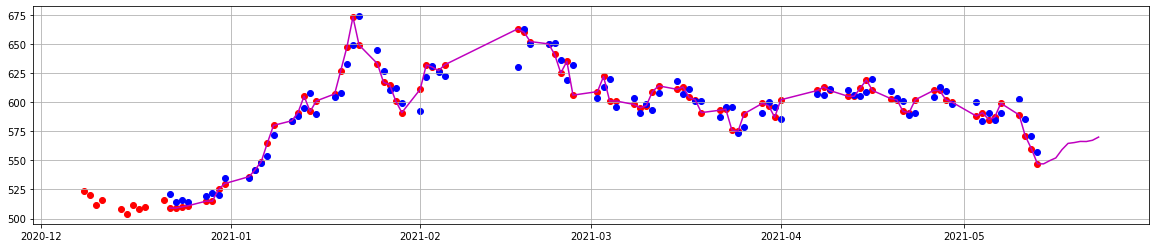

In [19]:
# Time Series 數據分析
last = -100

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 4))
plt.scatter(stock.index[last:], stock['Close'][last:], color='red')
plt.scatter(stock.index[-1*len(y_pred):], y_pred, color='blue')
plt.plot( np.append(stock.index[-1*len(y_pred):],pd.date_range(stock.index[-1], periods=next_days+1)[-1*next_days:]), y_next,color='m')
plt.grid()
plt.show()